<a href="https://colab.research.google.com/github/edwinb-ai/segnet/blob/master/ejemplos/albumentations_wbc_dataset_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import requests
from skimage import io as skio
from skimage import color
import numpy as np
from io import BytesIO
import glob

In [0]:
dataset_url = "https://raw.githubusercontent.com/zxaoyou/segmentation_WBC/master/Dataset%202/"
images = []
masks = []

In [0]:
for i in range(1, 101):
    filename = dataset_url + f"{i:03d}.bmp"
    r = requests.get(filename)
    img = skio.imread(BytesIO(r.content))
    images.append(img)

In [0]:
for i in range(1, 101):
    filename = dataset_url + f"{i:03d}.png"
    r = requests.get(filename)
    img = skio.imread(BytesIO(r.content))
    masks.append(img)

In [0]:
images = np.array(images, dtype=np.uint8)
masks = np.array(masks, dtype=np.uint8)

In [0]:
# masks = masks[:, :, :, None]

In [8]:
print(images.shape, masks.shape)

(100, 300, 300, 3) (100, 300, 300)


In [9]:
!pip install -U git+https://github.com/qubvel/segmentation_models
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-_d9vxx5n
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-_d9vxx5n
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.0b1-cp36-none-any.whl size=33612 sha256=e26f8e937370fb06759c95d867f9fb6a9bf50746b7a7adf477480e83ade0848e
  Stored in directory: /tmp/pip-ephem-wheel-cache-knz2ka2s/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models
  Found existing installation: segmentation-models 1.0.0b1
    Uninstalling segmentation-models-1.0.0b1:
      Successfully uninstalled segmentation-models-1.0.0b1
  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-4qq255jn
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-4qq255jn
     |████████████████████████████████| 22.1MB 1.9MB/s 
     

In [10]:
from keras.utils import Sequence
from keras.preprocessing.image import ImageDataGenerator
import albumentations as A

Using TensorFlow backend.


In [0]:
epochs = 15
batch_size = 32

In [0]:
def strong_aug():
    train_transform = [

        A.HorizontalFlip(p=0.6),

        A.ShiftScaleRotate(scale_limit=0.5, rotate_limit=0, shift_limit=0.1, p=1, border_mode=0),

#         A.PadIfNeeded(min_height=320, min_width=320, always_apply=True),
#         A.RandomCrop(height=320, width=320, always_apply=True),

        A.IAAAdditiveGaussianNoise(p=0.7),
        A.IAAPerspective(p=0.8),

#         A.OneOf(
#             [
#                 A.RandomBrightness(p=1),
#                 A.RandomGamma(p=1),
#             ],
#             p=0.9,
#         ),
        
        A.OneOf([
          A.ElasticTransform(p=0.8, alpha=120,
                             sigma=120 * 0.05,
                             alpha_affine=120 * 0.03),
          A.GridDistortion(p=0.7),
          A.OpticalDistortion(p=0.8, distort_limit=1, shift_limit=0.5)                  
        ], p=0.7),

        A.OneOf([
            A.OpticalDistortion(p=0.3),
            A.GridDistortion(p=0.1),
            A.IAAPiecewiseAffine(p=0.3),
        ], p=0.7),

        A.OneOf(
            [
                A.RandomContrast(p=0.8),
                A.HueSaturationValue(p=0.9),
            ],
            p=0.9,
        ),
        
        A.OneOf([
            A.CLAHE(clip_limit=2),
            A.IAASharpen(),
            A.IAAEmboss(),
            A.RandomBrightnessContrast(),
        ], p=0.3),
    ]
    return A.Compose(train_transform)
  
def additional_aug(image, mask):
    data = {"image": image, "mask": mask}
    augmentation = strong_aug()
    augmented = augmentation(**data)

    return augmented["image"], augmented["mask"]

In [0]:
path_imgs = "/content/drive/My Drive/Colab Notebooks/segmentacion-celular/data/images/"
path_masks = "/content/drive/My Drive/Colab Notebooks/segmentacion-celular/data/masks/"

# total = 24929

# for j in range(1):
#     for i in range(72):
#         img, msk = additional_aug(images[i], masks[i])
#         skio.imsave(path_imgs + f"{total:05d}.tif", img)
#         skio.imsave(path_masks + f"{total:05d}.tif", msk)
#         total += 1

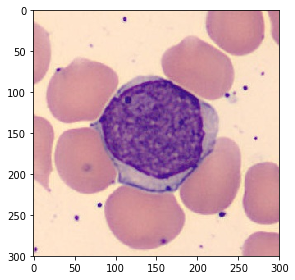

In [17]:
skio.imshow(images[0])

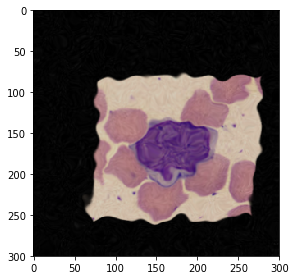

In [18]:
img_aug = skio.imread(path_imgs + "10000.tif")
skio.imshow(img_aug)